# S08 T01: Tasca Feature Engineering
## Nivell1
### - Exercici 1
***Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.***
***Per poder fer servir get_dummy prenc un dataset de basket on tenim la data del partit***
* ***Procediment***
*    -Importarem el CSV***
*    -El transformarem: 
*         - Afegin columna temporada, (A partir de la data del partit treurem la temporada y el dia de la setmana en que es juga el partit)
*         - Afegim dia de la setmana, 
*         - Pasem variables categóriques a numeriques, partit quanyat, fora/casa,diessetmana ( valors 0 o 1)
*         - Demanem al usuari que indentifigui el equip i la te,mporada a tractar
*         - Seleccionem tots el partits del equip selccionat i la temporada tenin en compte si juga a forta o casa ( 2 subsets)




******

* Per aquest exerci agafarem un Dataset del la Eurollivga de Basket on tenim informació historica dels partis


* Columns:
* DATE = Date
* HT = Home Team
* AT = Away Team
* WINNER = Team won the game
* HS = Home Score
* AS = Away Score
* Q1H = 1st quarter home score
* Q1A = 1st quarter away score
* Q2H = …
* Q2A = …
* Q3H = …
* Q3A = …
* Q4H = …
* Q4A = …
* OTH = Overtime home (to be added)
* OTA = Overtime away (to be added)
* P1H = 1st part home score
* P1A = 1st part away score
* P2H = 2nd part home score
* P2A = 2nd part away score
* P1T = part 1 total
* P2T = part 2 total
* HTT = half time total (=P1T)
* FTT = full time total
* GAPA1Q = Absolute number of gap between teams in points after 1st quarter
* GAPA2Q = Absolute number of gap between teams in points after 2nd quarter
* GAPA3Q = Absolute number of gap between teams in points after 3rd quarter
* GAPA4Q = Absolute number of gap between teams in points after 4rd quarter



   *     Importarem un Dataset i es concentrarem en l'evolució d'un equip

In [1]:
import pandas as pd
euroLigueDf=pd.read_csv('Euroleague2003_2020_upd.csv',index_col=False,sep=',', encoding='utf8')

***Passem la columna DATE a datetine i la separem en dia mes any per calcular la temporada dek partit formaf "2020-21"***

In [2]:
euroLigueDf['DATE'] =  pd.to_datetime(euroLigueDf['DATE']) 

In [3]:
#Funcio per calcular la temporada
def temporada(row):
    if row.MONTH <=6:
        any=int(row.YEAR/100)
        dec=int(row.YEAR%100)
        temporada=str(any)+str(dec-1).zfill(2)+"-"+str(dec).zfill(2)
    else:
        any=int(row.YEAR/100)
        dec=int(row.YEAR%100)
        temporada=str(any)+str(dec).zfill(2)+"-"+str(dec+1).zfill(2)
    return temporada

In [4]:
#Funcio per pasar la variable categórica a binaria , 1-gyanya partir , 0 - Perd partit
def guanyador(row,equip):
    win=0
    if row.Guanyador==equip:
        win=1
    return win

In [5]:
# Completem dataset amb Temporada i dia de la setmana del partit

euroLigueDf['DAY'] = euroLigueDf['DATE'].map(lambda x: x.day)
euroLigueDf['MONTH'] = euroLigueDf['DATE'].map(lambda x: x.month)
euroLigueDf['YEAR'] = euroLigueDf['DATE'].map(lambda x: x.year)
euroLigueDf['DIASEM'] = euroLigueDf['DATE'].map(lambda x: x.day_name())
euroLigueDf['TEMPORADA'] = euroLigueDf.apply (lambda row: temporada(row), axis=1)

# Ateciío la columna FTT resulta final total dels dos equips no es correcte
# Detectat perque era la única columna amb distribució no normal
# Recalculem aquesta columna con suma del HS + AS
euroLigueDf['FTT'] = euroLigueDf['HS']+ euroLigueDf['AS']


***Funció per extreure de les dades d'un equip***

In [6]:
def extreuEquip(euroLigueDf,equip,temporada):
     #RESULTATS A CASA
    teamGamesCasa = euroLigueDf[euroLigueDf['HT']=='Barcelona'][['TEMPORADA','DIASEM', 'WINNER', 'HS','AS','FTT','Q1H','Q1A','Q1T', 'Q2H','Q2A','Q2T', 'Q3H','Q3A', 'Q3T', 'Q4H', 'Q4A', 'Q4T', 'P1H','P1A', 'P1T','P2H', 'P2A', 'P2T']]
    teamGamesCasa['HOM0AWA1']=0
    nomActCol= ['TEMPORADA', 'DIASEM', 'WINNER', 'HS', 'AS', 'FTT', 'Q1H', 'Q1A', 'Q1T','Q2H', 'Q2A', 'Q2T', 'Q3H', 'Q3A', 'Q3T', 'Q4H', 'Q4A', 'Q4T', 'P1H','P1A', 'P1T', 'P2H', 'P2A', 'P2T','HOM0AWA1']
    nomNovesCol= ["Temporada", "DiaSem", "Guanyador","PuntsFavorFin", "PuntsContraFin", "PuntsFinTot","PtsFavorQ1", "PtsContraQ1","PtsTotQ1","PtsFavorQ2", "PtsContraQ2","PtsTotQ2", "PtsFavorQ3", "PtsContraQ3","PtsTotQ3", "PtsFavorQ4", "PtsContraQ4","PtsTotQ4", "PtsFavorP1", "PtsContraP1", "PtsTotP1", "PtsFavorP2","PtsContraP2" ,"PtsTotP2", "HomAwa"]
    colRenom = dict(zip(nomActCol, nomNovesCol))
    teamGamesCasa = teamGamesCasa.rename(columns=colRenom)[nomNovesCol]
    
    #RESULTATS A FORA
    teamGamesFora = euroLigueDf[euroLigueDf['AT']=='Barcelona'][['TEMPORADA','DIASEM', 'WINNER', 'AS','HS','FTT','Q1A','Q1H','Q1T', 'Q2A','Q2H','Q2T', 'Q3A','Q3H', 'Q3T', 'Q4A', 'Q4H', 'Q4T', 'P1A','P1H', 'P1T','P2A', 'P2H', 'P2T']]
    teamGamesFora['HOM0AWA1']=1
    nomActCol= ['TEMPORADA','DIASEM', 'WINNER',  'AS','HS','FTT','Q1A','Q1H','Q1T', 'Q2A','Q2H','Q2T', 'Q3A','Q3H', 'Q3T', 'Q4A', 'Q4H', 'Q4T', 'P1A','P1H', 'P1T','P2A', 'P2H', 'P2T','HOM0AWA1']
    colRenom = dict(zip(nomActCol, nomNovesCol))
    teamGamesFora = teamGamesFora.rename(columns=colRenom)[nomNovesCol]
    
    #CONCATENEM DATAFRAMES
    teamGamesDf=pd.concat([teamGamesCasa,teamGamesFora])
    teamGamesDf = pd.get_dummies(data=teamGamesDf, columns=["DiaSem"], prefix="WD", prefix_sep='_', drop_first=True)
    teamGamesDf["Guanyat"]=teamGamesDf.apply (lambda row: guanyador(row,equip), axis=1)
    #Seleccionem temporada
    teamGamesDf=teamGamesDf[teamGamesDf.Temporada==temporada]
    #Eliminem columnes categoriques no necessaaries
    teamGamesDf.drop(['Guanyador','Temporada'], axis=1,inplace=True)

    
    return(teamGamesDf)
    

***Funció que ens mostra la disstribució de les columnes, fa servir shapiro***

In [7]:
def distribucionsxColumne(dataSet, Columnes):
    Columnes = list(Columnes)
    # Distribueix les grafiques en files de 5 
    dec, num = math.modf(len(Columnes)/5)
    if dec == 0: rows = int(num)
    else: rows = int(num+1)
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,rows*4))
    
    binary = {0, 1}
    for i, col in zip(range(len(Columnes)), Columnes):
        counts = dataSet[col].value_counts()
        # Columna binaria
        if set(counts.index.to_list()) == binary:
            plt.subplot(rows, 5, i+1)
            sns.barplot(x=counts.index, y=counts.values)
            plt.title(col + ": binària")
            plt.xlabel("")
        else:
        # Columna no binaria
            stat, p = shapiro(dataSet[col])
            if p > 0.05:
                title = '{}: Probablement Normal\n'.format(col)
                color = "b"
            else:
                title = '{}: Probablement NO Normal\n'.format(col)
                color = "g"
            title += 'stat=%.3f, p=%.3f\n' % (stat, p)
        # Grafic de VIOLÍ per veure la distribució
            plt.subplot(rows, 5, i+1)
            ax = sns.violinplot(x=col, data=dataSet, color=color, orient='h', linewidth=1 , width=.5)
            if len(set(counts)) == 2: 
                title += "Dicotòmica"
                plt.xticks(ticks=counts.index, labels=counts.index.map('{:,.2f}'.format))
            plt.title(title, y=.8)
            plt.xlabel("")            
    plt.show()

In [8]:
import numpy as np
lista=euroLigueDf.HT.unique()
lista=np.append(lista,"fin")

*** Mostrem tots els equips i posteriorment totes les temporades***

*** La mostra a tractar serà del equip i la temporada seleccionats, eliminarem les dades no necessaries***

In [9]:
j=0
for i in range(0,lista.size-1,4):
     print("{0}-{1}\t\t{2}-{3}\t\t{4}-{5}\t\t{6}-{7}".format(i,lista[i],i+1,lista[i+1],i+2,lista[i+2],i+3,lista[i+3]))



0-Barcelona		1-Lyon-Villeurbanne		2-Bayern		3-Zalgiris Kaunas
4-Real Madrid		5-Maccabi Tel Aviv		6-Crvena zvezda mts		7-Fenerbahce
8-Khimki M.		9-Baskonia		10-Panathinaikos		11-Zenit Petersburg
12-Olimpia Milano		13-CSKA Moscow		14-Olympiacos		15-Anadolu Efes
16-Alba Berlin		17-Valencia		18-Anadolu Efes SK		19-Fenerbahce Ulker
20-Darussafaka Ct		21-Khimki		22-Gran Canaria		23-Buducnost
24-Crvena Zvezda		25-Unicaja		26-Bamberg		27-Galatasaray CC
28-Unics Kazan		29-Guandong		30-Sichuan		31-Lokomotiv Kuban
32-Cedevita		33-Zielona Gora		34-Strasbourg		35-Limoges
36-Sassari		37-Pinar Karsiyaka		38-Nizhny Novgorod		39-PGE Turow Zgorzelec
40-Neptunas		41-ASVEL		42-Hapoel Jerusalem		43-BC Oostende
44-VEF Riga		45-Partizan		46-Lietuvos Rytas		47-Montepaschi Siena
48-Nanterre		49-Budivelnyk		50-Besiktas CT		51-Chalon/Saone
52-Petrol Olimpija		53-Cantu		54-Asseco Gdynia		55-Bilbao Basket
56-Spirou Charleroi		57-Nancy		58-Zagreb		59-Cibona
60-CEZ Nymburk		61-PAOK		62-Virtus Roma		63-Cholet
64-Le M

In [10]:
ind=int(input("Equipo"))

Equipo0


In [11]:

while ((ind<0) or (ind>lista.size-1)) :
    ind=int(input("Equipo"))
equip=lista[ind]

In [12]:
temp=euroLigueDf.TEMPORADA.unique()
for i in range(temp.size-1):
     print ("{0}-\t{1}".format(i,temp[i]))

0-	2019-20
1-	2018-19
2-	2017-18
3-	2016-17
4-	2015-16
5-	2014-15
6-	2013-14
7-	2012-13
8-	2011-12
9-	2010-11
10-	2009-10
11-	2008-09
12-	2007-08
13-	2006-07
14-	2005-06
15-	2004-05
16-	2003-04


In [13]:
ind=int(input("Selecciona la temporada : "))
if (ind<temp.size-1):
    temporada=temp[ind]
    

Selecciona la temporada : 0


In [14]:
#Extreu mostra i Comprova nuls
dataSetDf=extreuEquip(euroLigueDf,equip,temporada)
dataSetDf.isnull().sum().sum()


0

In [15]:
dataSetDf

,PuntsFavorFin,PuntsContraFin,PuntsFinTot,PtsFavorQ1,PtsContraQ1,PtsTotQ1,PtsFavorQ2,PtsContraQ2,PtsTotQ2,PtsFavorQ3,...,PtsContraP2,PtsTotP2,HomAwa,WD_Monday,WD_Saturday,WD_Sunday,WD_Thursday,WD_Tuesday,WD_Wednesday,Guanyat
0,98,86,184,28,23,51,27,24,51,16,...,39,82,0,0,0,0,0,0,0,1
18,67,96,163,20,18,38,18,33,51,12,...,45,74,0,0,0,0,0,0,0,0
27,96,73,169,21,18,39,22,28,50,31,...,27,80,0,0,0,0,0,0,0,1
36,89,63,152,25,15,40,19,15,34,23,...,33,78,0,0,0,0,0,0,1,1
72,83,77,160,21,19,40,23,22,45,18,...,36,75,0,0,0,0,0,0,1,1
90,103,84,187,19,25,44,27,19,46,26,...,40,97,0,0,0,0,0,0,0,1
205,78,72,150,23,20,43,22,18,40,15,...,34,67,0,0,0,0,0,1,0,1
233,79,68,147,17,13,30,20,23,43,19,...,32,74,0,0,0,0,0,0,0,1
50,76,86,162,14,32,46,36,16,52,14,...,38,64,1,0,0,0,1,0,0,0
56,93,86,179,23,20,43,24,20,44,19,...,46,92,1,0,0,1,0,0,0,1


C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


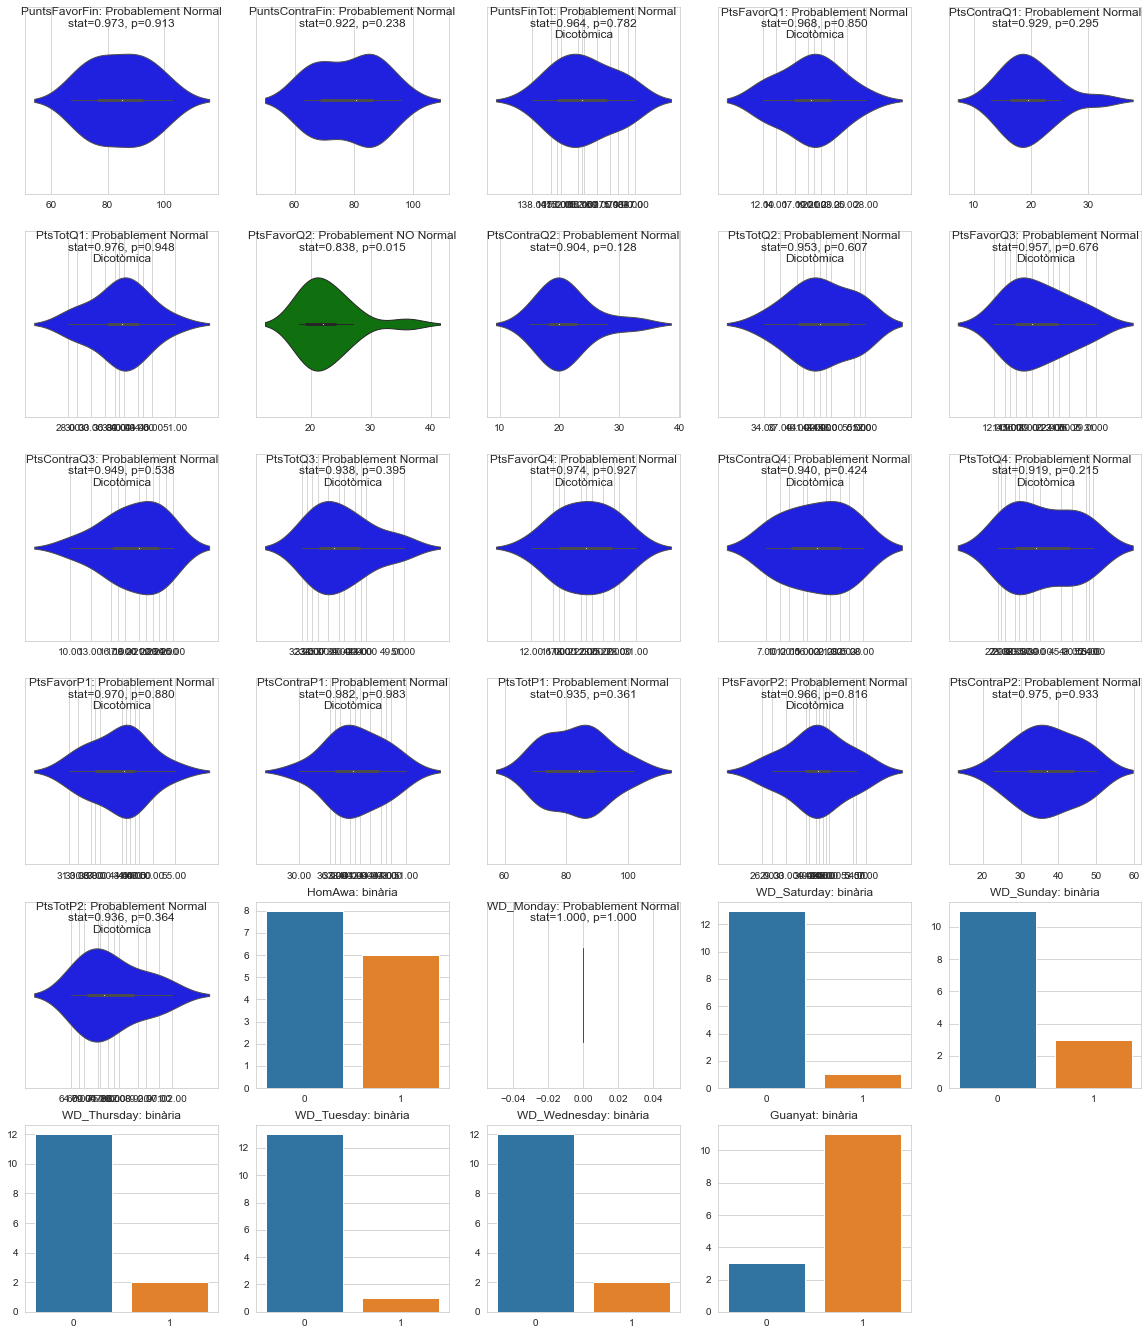

In [16]:
import math
from scipy.stats import shapiro
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
    
distribucionsxColumne(dataSetDf, dataSetDf.columns)

***Standaritzem amb standard scaler***

In [17]:
from sklearn import preprocessing

#Estandaritzem les característiques amb StandardScaler
standardscaler = preprocessing.StandardScaler()
dataSetDfStandar = pd.DataFrame(standardscaler.fit_transform(dataSetDf), columns=dataSetDf.columns)
dataSetDfStandar.head()


,PuntsFavorFin,PuntsContraFin,PuntsFinTot,PtsFavorQ1,PtsContraQ1,PtsTotQ1,PtsFavorQ2,PtsContraQ2,PtsTotQ2,PtsFavorQ3,...,PtsContraP2,PtsTotP2,HomAwa,WD_Monday,WD_Saturday,WD_Sunday,WD_Thursday,WD_Tuesday,WD_Wednesday,Guanyat
0,1.276923,0.726881,1.504360,1.908176,0.653846,1.962419,0.893136,0.609598,1.293054,-0.774339,...,0.236991,0.238659,-0.866025,0.0,-0.27735,-0.522233,-0.408248,-0.27735,-0.408248,0.522233
1,-1.639838,1.669135,0.020193,0.141930,-0.410554,-0.215387,-1.081165,2.579070,1.293054,-1.497055,...,1.002655,-0.464757,-0.866025,0.0,-0.27735,-0.522233,-0.408248,-0.27735,-0.408248,-1.914854
2,1.088745,-0.498048,0.444241,0.362711,-0.410554,-0.047864,-0.203698,1.484919,1.104484,1.935846,...,-1.294337,0.062805,-0.866025,0.0,-0.27735,-0.522233,-0.408248,-0.27735,-0.408248,0.522233
3,0.430122,-1.440302,-0.757228,1.245834,-1.049195,0.119660,-0.861798,-1.359873,-1.912642,0.490414,...,-0.528673,-0.113049,-0.866025,0.0,-0.27735,-0.522233,-0.408248,-0.27735,2.449490,0.522233
4,-0.134413,-0.121147,-0.191831,0.362711,-0.197674,0.119660,0.015669,0.171938,0.161632,-0.412981,...,-0.145841,-0.376830,-0.866025,0.0,-0.27735,-0.522233,-0.408248,-0.27735,2.449490,0.522233


# Nivell 2
## Exercici 2

***Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.***

* Com a punt de partida prenem el datset standaritzat al punt anterior dataSetDfStandar i apliquem el analisis de components


In [62]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [63]:
#com ja tenim les dades estandatitzades (requisit pel correcte funcionament del PCA), utilitzem el dataframe creat
pca = PCA()
pca.fit(dataSetDfStandar)

#veiem el porcentatge de variança explicada per cada component
pca.explained_variance_ratio_

array([2.35447920e-01, 2.25123086e-01, 1.79034222e-01, 9.71813851e-02,
       8.18366786e-02, 5.53954214e-02, 5.21621749e-02, 2.88939577e-02,
       2.64518986e-02, 1.04849188e-02, 5.00661514e-03, 2.91280454e-03,
       6.89175824e-05, 1.51026609e-33])

In [64]:
#influència de les variables en cada component
index = ["PC" + str(i) for i in range(pca.n_components_)]
principalCompoDf = pd.DataFrame(data=pca.components_, columns=dataSetDfStandar.columns, index=index)
principalCompoDf

,PuntsFavorFin,PuntsContraFin,PuntsFinTot,PtsFavorQ1,PtsContraQ1,PtsTotQ1,PtsFavorQ2,PtsContraQ2,PtsTotQ2,PtsFavorQ3,...,PtsContraP2,PtsTotP2,HomAwa,WD_Monday,WD_Saturday,WD_Sunday,WD_Thursday,WD_Tuesday,WD_Wednesday,Guanyat
PC0,-0.028054,0.228462,0.150287,0.056952,0.300903,0.280007,0.274533,0.092887,0.316034,-0.231281,...,0.074866,-0.107353,-0.039135,-0.0,-0.030917,-0.098785,0.083244,0.029218,-0.101608,-0.208943
PC1,0.332904,0.145832,0.359442,0.196111,0.027566,0.170497,0.020856,0.037614,0.050341,0.159244,...,0.159044,0.334224,-0.061330,0.0,-0.037645,0.142732,-0.226395,-0.104706,-0.021378,0.141052
PC2,-0.205736,0.304078,0.073538,-0.284925,0.089936,-0.145421,-0.098600,0.015771,-0.071168,0.059065,...,0.348708,0.201000,0.227471,0.0,0.322005,0.037005,0.041311,-0.106634,-0.143387,-0.297476
PC3,-0.114005,0.105753,-0.006314,0.175594,-0.301295,-0.103863,-0.373391,0.486720,0.098444,-0.027927,...,0.040003,0.000756,-0.394658,-0.0,-0.019989,-0.175515,-0.337610,0.110866,0.042189,-0.019394
PC4,0.104852,-0.071218,0.025342,-0.268096,-0.018813,-0.218230,0.097870,0.257956,0.306416,0.307908,...,-0.235600,0.003193,0.148082,-0.0,-0.157295,0.097471,0.210891,-0.224138,-0.312663,0.077705
PC5,-0.115285,0.043589,-0.053902,0.060158,-0.201842,-0.113190,-0.101655,0.257821,0.134786,-0.366520,...,0.029679,-0.070498,0.226054,-0.0,-0.203071,0.436800,-0.043049,-0.260716,-0.198842,-0.027700
PC6,-0.007965,-0.021428,-0.022055,0.035751,0.028225,0.049339,-0.024589,-0.117399,-0.122302,-0.089488,...,0.022522,0.003693,0.234257,-0.0,-0.004346,0.435130,-0.175747,0.577271,-0.319778,0.152572
PC7,-0.034686,0.074152,0.029564,0.080503,-0.139052,-0.048342,0.041987,-0.001324,0.034952,0.043164,...,0.184551,0.045856,0.146484,0.0,-0.426371,0.287275,0.184100,-0.161261,0.575933,0.065558
PC8,0.027970,-0.094656,-0.049988,-0.018856,0.143180,0.098367,-0.031031,-0.024771,-0.048020,-0.048841,...,-0.199578,-0.091429,0.164646,0.0,0.457059,0.241515,-0.386744,-0.363891,0.373155,-0.153924
PC9,-0.052165,0.029415,-0.017120,-0.474529,0.127225,-0.259944,0.272253,-0.172734,0.085184,-0.281807,...,0.064302,0.075416,-0.303763,0.0,-0.197507,-0.122863,-0.140154,-0.007386,0.141691,0.140611


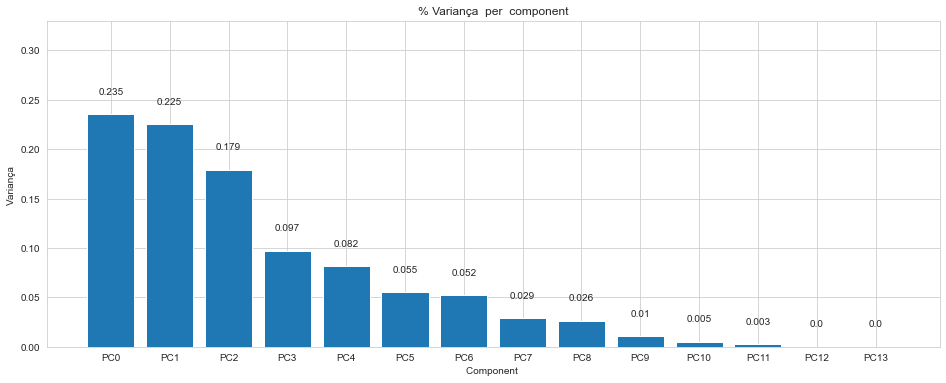

In [65]:
#Diagrama de barras per veure el que explica cada component
plt.figure(figsize=(16, 6))
plt.bar(x=np.arange(pca.n_components_), height=pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(dataSetDfStandar.columns)), pca.explained_variance_ratio_):
    plt.annotate(round(y, 3), (x,y), textcoords="offset points", xytext=(0,20), ha='center')

plt.xticks(np.arange(pca.n_components_), labels=principalCompoDf.index)
plt.ylim(0, .33)
plt.title('% Variança  per  component')
plt.xlabel('Component ')
plt.ylabel('Variança ')
plt.show()

***Per veure la influència de cada atribut per cada component principal fem un diagrama de calor***

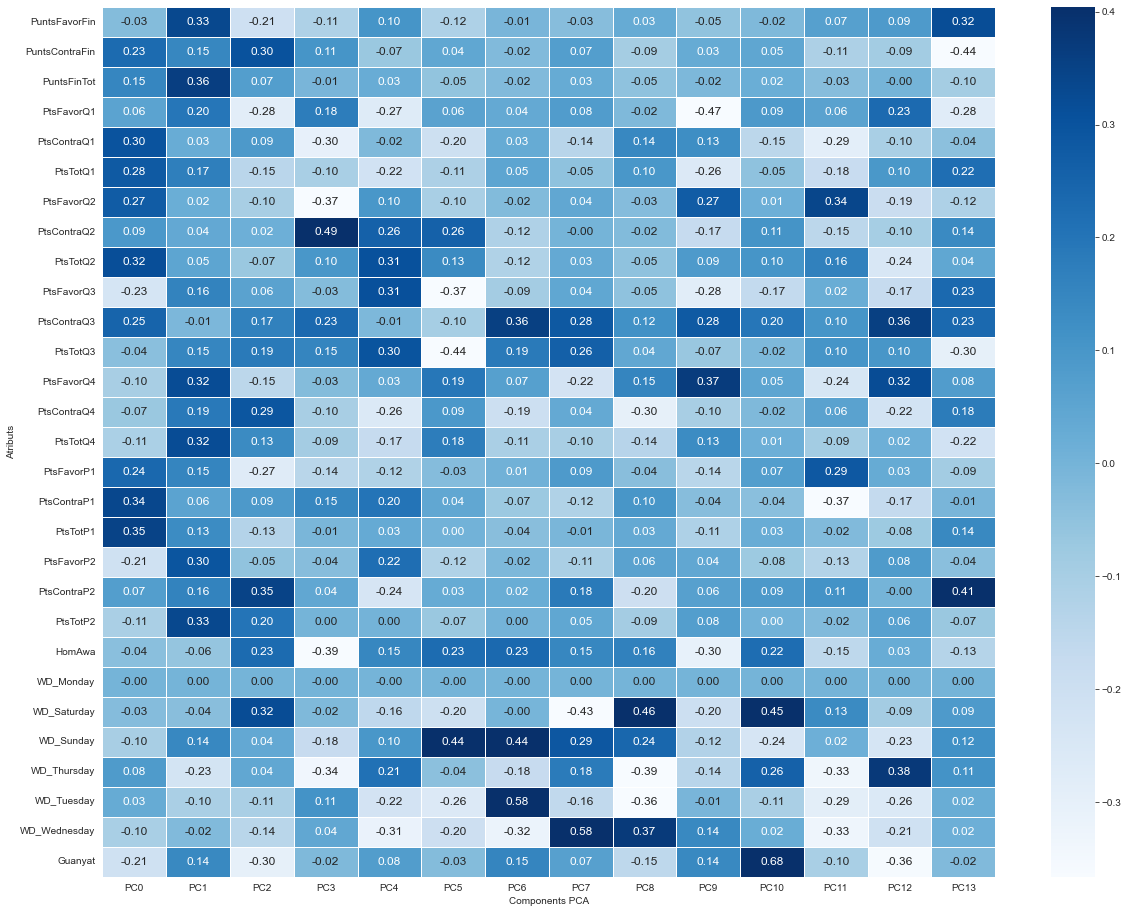

In [66]:
#Podem visualitzar La influència de les variables en cada component amb un heatmap
plt.figure(figsize=(20,16))
sns.heatmap(principalCompoDf.T, annot=True, annot_kws={"size": 12}, cmap="Blues", fmt='.2f', robust=True, linewidths=1, linecolor="w")
plt.xlabel("Components PCA")
plt.ylabel("Atributs")
plt.show()

***Recorreem el resultat desde la componen1 fins la 14 per veure la vatriació acumulada explicada***

In [67]:

variancaAcumStdSca = pca.explained_variance_ratio_.cumsum()
for i in range (len(variancaAcumStdSca)):
    print('suma PC{0} : {1}'.format(i,variancaAcumStdSca[i]))
                        
                        
 


suma PC0 : 0.23544791982947794
suma PC1 : 0.4605710060898842
suma PC2 : 0.6396052276432356
suma PC3 : 0.7367866127226641
suma PC4 : 0.8186232913402552
suma PC5 : 0.8740187127139147
suma PC6 : 0.9261808876093599
suma PC7 : 0.9550748453526025
suma PC8 : 0.9815267439198697
suma PC9 : 0.9920116627362677
suma PC10 : 0.9970182778789743
suma PC11 : 0.9999310824175771
suma PC12 : 1.0
suma PC13 : 1.0


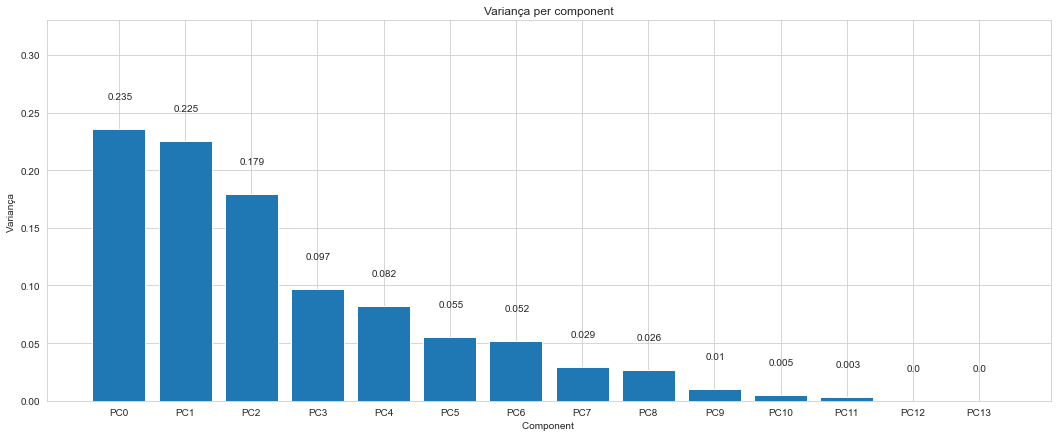

In [68]:
#Dibuixem amb un gràfic de barres aquest percentatge de variança explicada per cada component
plt.figure(figsize=(18, 7))
plt.bar(x=np.arange(pca.n_components_), height=pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(dataSetDfStandar.columns)), pca.explained_variance_ratio_):
    plt.annotate(round(y, 3), (x,y), textcoords="offset points", xytext=(1,30), ha='center')

plt.xticks(np.arange(pca.n_components_), labels=principalCompoDf.index)
plt.ylim(0, .33)
plt.title('Variança per component')
plt.xlabel('Component ')
plt.ylabel('Variança ')
plt.show()

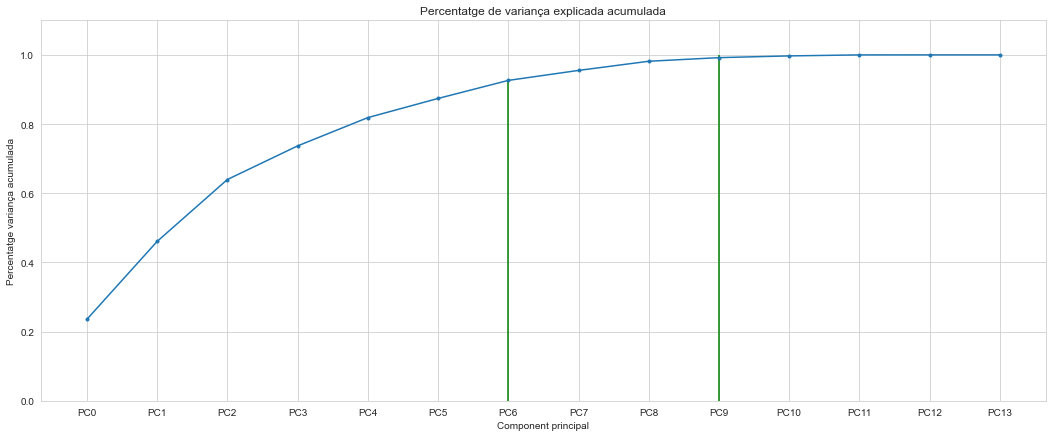

In [69]:
#Podem dibuixar la acumulació
variancaAcumStdSca = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(18, 7))
plt.plot(np.arange(pca.n_components_), variancaAcumStdSca, marker='.')


plt.ylim(0, 1.1)
plt.xticks(np.arange(pca.n_components_), labels=principalCompoDf.index)
plt.vlines(x=[6, 9], ymin=0, ymax=[variancaAcumStdSca[6], 1], color="g")

plt.title('Percentatge de variança explicada acumulada')
plt.xlabel('Component principal')
plt.ylabel('Percentatge variança acumulada')
plt.show()

* Conclusions


***podem reduïr el nou dataframe de PCs en una dimensió respecte al de l'origen de dades sense perdre cap informació***
    
***podem reduïr a quasi la meitat de dimensions (de 28 a 6) conservant el 92% de la informació***



# Nivell 3
## Exercici 3

***Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.***

***Faré servir la funcio per eliuminar outliers que vaig construir en modul anterios elim_outliners***

* Veiem mitjançant el grafic der Boxplot si tenim moils outliers segons la norma
* Calculate 1.5*IQR below the first quartile and check for low outliers.
* Calculate 1.5*IQR above the third quartile and check for outliers

***Veiem que hi ha  pocs outliers, farem servir el maxmin scaler i ell robust scaler per tenir en compte l'efecte dels outliers. En aquest cas no els eliminarem ni modificarem sino que tindrá, menys efecte que sense normalitzar***

***Farem la Normalitzacio amb MinMAx,Robust i despres compararem la variaança acumulada per component entre Standard Scaler (Ecercici 2) i Robust  per mostrar que en aquest cas la diferència no es significativa ja que els outliers no son gens significatius***


In [70]:

#Funció per mostrar diagrama de caixes per totes les columnes numeriques de la nostra mostra original
def mostraBoxPlot(dataSet,numericColumns):  
    numericColsList = list(numericColumns)
    dec, num = math.modf(len(numericColsList)/4)
    if dec == 0: rows = int(num)
    else: rows = int(num+1)
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,rows*4))
    for i, col in zip(range(len(numericColsList)), numericColsList):
        plt.subplot(rows, 5, i+1)
        ax = sns.boxplot(x=col, data=dataSet, orient='h', linewidth=1 , width=.5)
        plt.title(col, y=.85)
        plt.xlabel("")
    plt.show()

***Construim el boxplot de la dataframe original sense standaritzar per comprovar outliers***

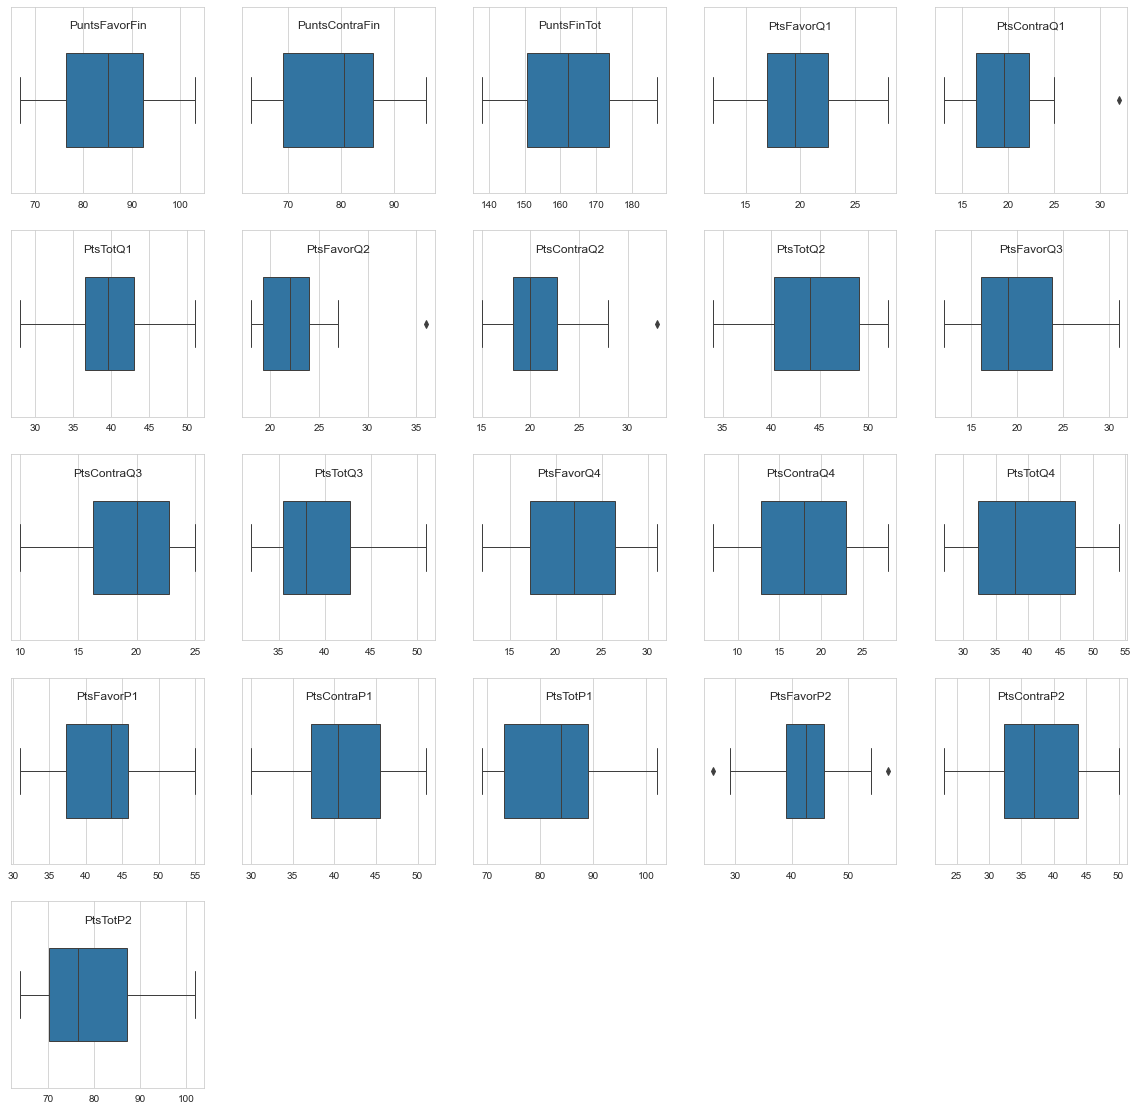

In [71]:
numericColumns=['PuntsFavorFin', 'PuntsContraFin', 'PuntsFinTot', 'PtsFavorQ1','PtsContraQ1', 'PtsTotQ1', 'PtsFavorQ2', 'PtsContraQ2', 'PtsTotQ2','PtsFavorQ3', 'PtsContraQ3', 'PtsTotQ3', 'PtsFavorQ4', 'PtsContraQ4','PtsTotQ4', 'PtsFavorP1', 'PtsContraP1', 'PtsTotP1', 'PtsFavorP2','PtsContraP2', 'PtsTotP2']
mostraBoxPlot(dataSetDf,numericColumns)

***Fem servir el MinMax Scaler***

In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
dataSetDfStandarInput = dataSetDf
dataSetDfStandarInput = MinMaxScaler().fit_transform(dataSetDfStandarInput)
dataSetDfStandarInput = pd.DataFrame(dataSetDfStandarInput,columns=dataSetDf.columns).set_index(dataSetDf.index)
dataSetDfStandarInput = dataSetDfStandarInput.dropna()
dataSetDfStandarInput

,PuntsFavorFin,PuntsContraFin,PuntsFinTot,PtsFavorQ1,PtsContraQ1,PtsTotQ1,PtsFavorQ2,PtsContraQ2,PtsTotQ2,PtsFavorQ3,...,PtsContraP2,PtsTotP2,HomAwa,WD_Monday,WD_Saturday,WD_Sunday,WD_Thursday,WD_Tuesday,WD_Wednesday,Guanyat
0,0.861111,0.696970,0.938776,1.0000,0.526316,1.000000,0.500000,0.500000,0.944444,0.210526,...,0.592593,0.473684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18,0.000000,1.000000,0.510204,0.5000,0.263158,0.434783,0.000000,1.000000,0.944444,0.000000,...,0.814815,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.805556,0.303030,0.632653,0.5625,0.263158,0.478261,0.222222,0.722222,0.888889,1.000000,...,0.148148,0.421053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36,0.611111,0.000000,0.285714,0.8125,0.105263,0.521739,0.055556,0.000000,0.000000,0.578947,...,0.370370,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
72,0.444444,0.424242,0.448980,0.5625,0.315789,0.521739,0.277778,0.388889,0.611111,0.315789,...,0.481481,0.289474,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
90,1.000000,0.636364,1.000000,0.4375,0.631579,0.695652,0.500000,0.222222,0.666667,0.736842,...,0.629630,0.868421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205,0.305556,0.272727,0.244898,0.6875,0.368421,0.652174,0.222222,0.166667,0.333333,0.157895,...,0.407407,0.078947,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
233,0.333333,0.151515,0.183673,0.3125,0.000000,0.086957,0.111111,0.444444,0.500000,0.368421,...,0.333333,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50,0.250000,0.696970,0.489796,0.1250,1.000000,0.782609,1.000000,0.055556,1.000000,0.105263,...,0.555556,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,0.722222,0.696970,0.836735,0.6875,0.368421,0.652174,0.333333,0.277778,0.555556,0.368421,...,0.851852,0.736842,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


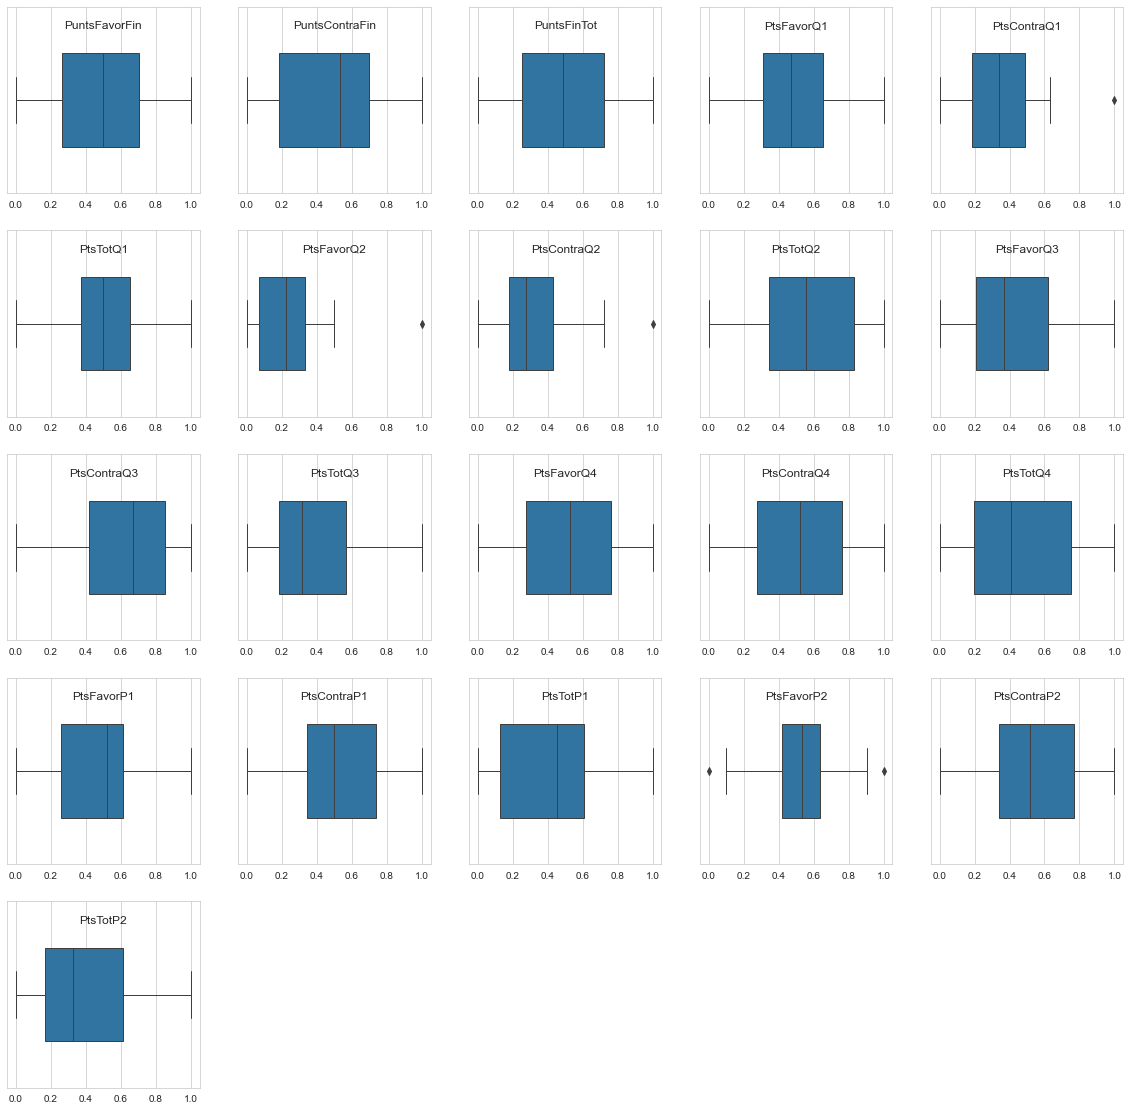

In [73]:
numericColumns=['PuntsFavorFin', 'PuntsContraFin', 'PuntsFinTot', 'PtsFavorQ1','PtsContraQ1', 'PtsTotQ1', 'PtsFavorQ2', 'PtsContraQ2', 'PtsTotQ2','PtsFavorQ3', 'PtsContraQ3', 'PtsTotQ3', 'PtsFavorQ4', 'PtsContraQ4','PtsTotQ4', 'PtsFavorP1', 'PtsContraP1', 'PtsTotP1', 'PtsFavorP2','PtsContraP2', 'PtsTotP2']
mostraBoxPlot(dataSetDfStandarInput,numericColumns)

***Fem servir el Robust Scaler***

In [74]:
#Preparem el modeul Robusr Scaler
robustescaler = preprocessing.RobustScaler()
dataSetDf_Robust = pd.DataFrame(robustescaler.fit_transform(dataSetDf), columns=dataSetDf.columns)
dataSetDf_Robust.head(5)

,PuntsFavorFin,PuntsContraFin,PuntsFinTot,PtsFavorQ1,PtsContraQ1,PtsTotQ1,PtsFavorQ2,PtsContraQ2,PtsTotQ2,PtsFavorQ3,...,PtsContraP2,PtsTotP2,HomAwa,WD_Monday,WD_Saturday,WD_Sunday,WD_Thursday,WD_Tuesday,WD_Wednesday,Guanyat
0,0.825397,0.323529,0.956522,1.545455,0.608696,1.769231,1.052632,0.888889,0.800000,-0.387097,...,0.173913,0.323529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.142857,0.911765,0.043478,0.090909,-0.260870,-0.230769,-0.842105,2.888889,0.800000,-0.903226,...,0.695652,-0.147059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.698413,-0.441176,0.304348,0.272727,-0.260870,-0.076923,0.000000,1.777778,0.685714,1.548387,...,-0.869565,0.205882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.253968,-1.029412,-0.434783,1.000000,-0.782609,0.076923,-0.631579,-1.111111,-1.142857,0.516129,...,-0.347826,0.088235,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.126984,-0.205882,-0.086957,0.272727,-0.086957,0.076923,0.210526,0.444444,0.114286,-0.129032,...,-0.086957,-0.088235,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


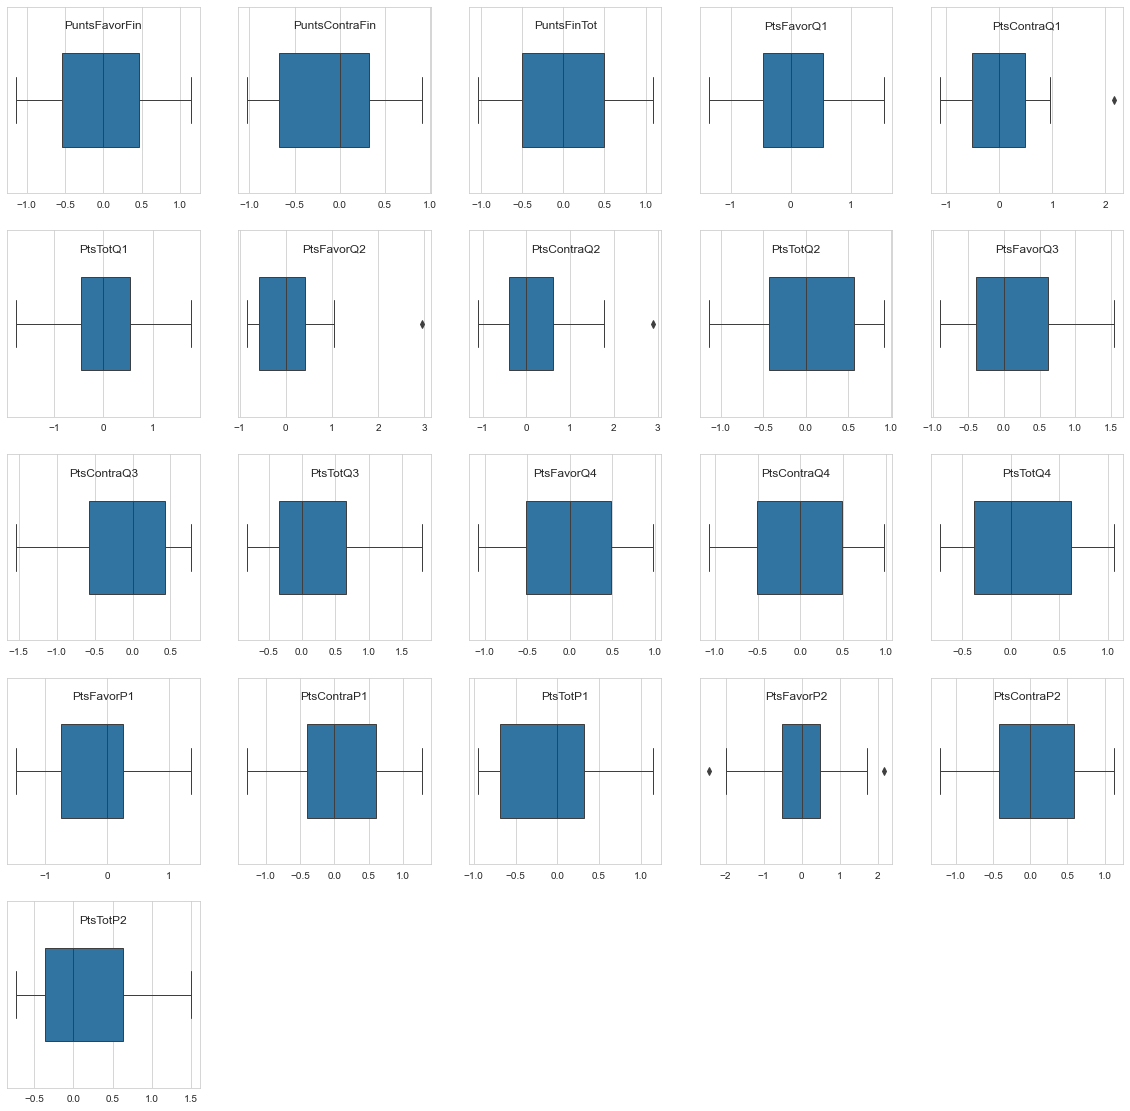

In [75]:
numericColumns=['PuntsFavorFin', 'PuntsContraFin', 'PuntsFinTot', 'PtsFavorQ1','PtsContraQ1', 'PtsTotQ1', 'PtsFavorQ2', 'PtsContraQ2', 'PtsTotQ2','PtsFavorQ3', 'PtsContraQ3', 'PtsTotQ3', 'PtsFavorQ4', 'PtsContraQ4','PtsTotQ4', 'PtsFavorP1', 'PtsContraP1', 'PtsTotP1', 'PtsFavorP2','PtsContraP2', 'PtsTotP2']
mostraBoxPlot(dataSetDf_Robust,numericColumns)

* ***CONCLUSIO***

***El nostre conjunt de dades te pocs outliers i poc significatius,  per tant les transformacions amb robust o MInMax i Standard no donen grans diferències***

***En el cas que el nombre de outliers fos gran o molt significatiu hauriem d'aplicar un ajustament o eliminació de valors outliers i aplicar el mètode de normalitzacio mes convenients***

***Veiem ala comparativa de variances acumulades amb PCA amb Stardard Scaler i Robust que confirma la poca variació****


In [77]:
#com ja tenim les dades estandatitzades, utilitzem el dataframe creat amb Robusr
pca = PCA()
pca.fit(dataSetDf_Robust)

#veiem el porcentatge de variança explicada per cada component
pca.explained_variance_ratio_

array([2.89450074e-01, 2.46450744e-01, 1.54417505e-01, 1.28557174e-01,
       8.46742158e-02, 4.01470538e-02, 2.38344183e-02, 1.38710946e-02,
       8.82770381e-03, 6.74808221e-03, 1.61853684e-03, 1.37232443e-03,
       3.10734748e-05, 3.21367848e-33])

In [78]:

variancaAcumRobust = pca.explained_variance_ratio_.cumsum()
for i in range (len(variancaAcumStdSca)):
    print('suma PC{0} : {1}'.format(i,variancaAcumRobust[i]))
                        
                        

suma PC0 : 0.2894500741442404
suma PC1 : 0.5359008176499628
suma PC2 : 0.6903183224695191
suma PC3 : 0.8188754966795164
suma PC4 : 0.9035497125087124
suma PC5 : 0.9436967663260926
suma PC6 : 0.96753118463295
suma PC7 : 0.981402279235337
suma PC8 : 0.9902299830462593
suma PC9 : 0.9969780652530634
suma PC10 : 0.9985966020920871
suma PC11 : 0.9999689265252143
suma PC12 : 1.0000000000000002
suma PC13 : 1.0000000000000002


In [79]:
for i in range(len(sumesRobust)):
    print ("PCA{0}\t Standard Scaler : {1}\t Robust Scaler{2}\t Diferència{3}".format(i,variancaAcumStdSca[i],variancaAcumRobust[i],(variancaAcumStdSca[i]-variancaAcumRobust[i])))

PCA0	 Standard Scaler : 0.23544791982947794	 Robust Scaler0.2894500741442404	 Diferència-0.05400215431476246
PCA1	 Standard Scaler : 0.4605710060898842	 Robust Scaler0.5359008176499628	 Diferència-0.07532981156007856
PCA2	 Standard Scaler : 0.6396052276432356	 Robust Scaler0.6903183224695191	 Diferència-0.0507130948262835
PCA3	 Standard Scaler : 0.7367866127226641	 Robust Scaler0.8188754966795164	 Diferència-0.08208888395685232
PCA4	 Standard Scaler : 0.8186232913402552	 Robust Scaler0.9035497125087124	 Diferència-0.08492642116845717
PCA5	 Standard Scaler : 0.8740187127139147	 Robust Scaler0.9436967663260926	 Diferència-0.06967805361217783
PCA6	 Standard Scaler : 0.9261808876093599	 Robust Scaler0.96753118463295	 Diferència-0.041350297023590055
PCA7	 Standard Scaler : 0.9550748453526025	 Robust Scaler0.981402279235337	 Diferència-0.026327433882734508
PCA8	 Standard Scaler : 0.9815267439198697	 Robust Scaler0.9902299830462593	 Diferència-0.008703239126389595
PCA9	 Standard Scaler : 0.99

In [76]:
#En cas d'ajustaments d'outliers podriem adaptar la funció que vaig fer per elimnació d'outliers 
#pero en aqquest cas modifican el valors dels outliers
#Només ho deixo apuntat pero no ho faré

#
#def elim_outliners(in_df, min,max,columna):3
#    quantile1= in_df[columna].quantile(min)
#    quantile3= in_df[columna].quantile(max)
#    iqr = quantile3-quantile1 #Interquartile range
#    rang_low  = quantile1-1.5*iqr
#    rang_high = quantile3+1.5*iqr
#    out_df = in_df.loc[(in_df[columna]> rang_low)&(in_df[columna]< rang_high)]
#    return out_df